# Classification of magnetic phases using a convolutional neural network

### Machine learning phases of matter

Analysis based on a data set used in the paper *Machine learning phases of matter*, by Juan Carrasquilla & Roger G. Melko, published in *Nature Physics* in 2017: https://www.nature.com/articles/nphys4035

Nature Physics, **13**, 431–434 (2017)

### Data and task description

We consider a 2-dimensional square lattice of $n×n$ magnetic dipole moments (spins) that can be in one of two states (+1 or −1, Ising model). We assume that interactions between spins are of short ranged, i.e. each spin interacts only with its four neighbors. The probability to find a spin in one of the orientations is a function of temperature $T$ according to $ p∼ e^{−a/T} $, where $a=const$.

At very low temperatures $T→0$, neighboring spins have a very low probability of different orientations, so that a uniform overall state (ferromagnetic state) is adopted, characterized by +1 or −1. At very high temperatures $T \rightarrow \infty $, a paramagnetic phase with random spin alignment results, yielding 50% of +1 and 0 of −1 orientations. Below a critical temperature $0<T<T_c$, stable ferromagnetic domains emerge, with both orientations being equally probable in the absence of an external magnetic field. The spin-spin correlations diverge at $T_c$, whereas the correlation decays for $T>T_c$.

The data set for this task contains the $n×n$ dipole orientations on the lattice for different temperatures $T$. The task is to use a convolutional neural network for classifying the two magnetic phases.

### Import data

In [1]:
import keras
import numpy as np
callbacks = keras.callbacks
layers = keras.layers

print("keras", keras.__version__)

keras 2.15.0


In [2]:
path = r"/Users/murilo/Downloads/Tutorials-20231205/Tutorial 5/ising_data.npz"
f = np.load(path, allow_pickle=True)
n_train = 20000

x_train, x_test = f["C"][:n_train], f["C"][n_train:]
T_train, T_test = f["T"][:n_train], f["T"][n_train:]

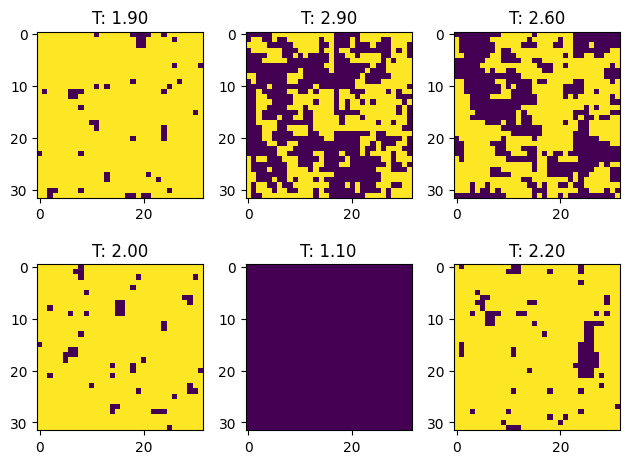

In [3]:
import matplotlib.pyplot as plt

for i,j in enumerate(np.random.choice(n_train, 6)):
    plt.subplot(2,3,i+1)
    image = x_train[j]
    plot = plt.imshow(image)
    plt.title("T: %.2f" % T_train[j])

plt.tight_layout()
plt.show()

Text(0, 0.5, 'frequency')

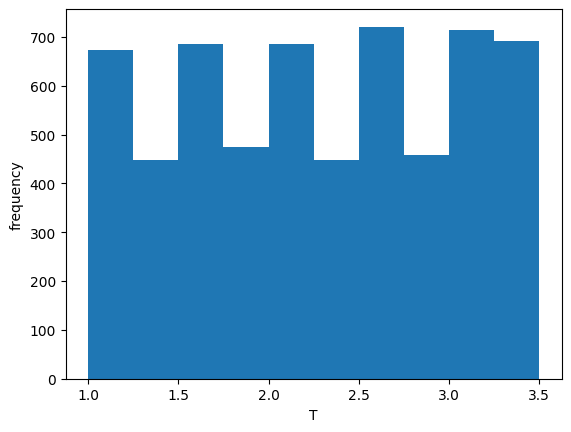

In [4]:
plt.hist(T_test)
plt.xlabel("T")
plt.ylabel("frequency")

#### Definition of magnetic phases in the training set

In [5]:
Tc = 2.27
y_train, y_test = T_train > Tc, T_test > Tc

### Tasks

- Construct a convolutional neural network (with Keras) for the classification of magnetic phases
- Evaluate the network's performance on the test set, by plotting the test accuracy as function of temperature
- Compare to the results obtained using a fully-connected network (Notebook 7)

### 1. Design the network

In [6]:
# Create a Sequential model, which represents a linear stack of layers.
model = keras.models.Sequential()

# Add an input layer to the model with a specified input shape of (32, 32).
model.add(layers.InputLayer(input_shape=(32, 32)))

# Reshape the input to have a single channel (assuming grayscale image).
model.add(layers.Reshape((32, 32, 1)))

# Add the first convolutional layer with 16 filters, a filter size of (3, 3),
# 'same' padding to maintain the input size, and ReLU activation.
model.add(layers.Convolution2D(16, (3, 3), padding='same', activation='relu'))

# Add the second convolutional layer with 16 filters, a filter size of (3, 3),
# 'same' padding, and ReLU activation.
model.add(layers.Convolution2D(16, (3, 3), padding='same', activation='relu'))

# # Add a MaxPooling2D layer with a pool size of (2, 2)
# model.add(layers.MaxPooling2D((2, 2)))
# # After this max pooling layer, the spatial dimensions are halved, resulting in a size of 16x16.

# Add a GlobalAveragePooling2D layer
model.add(layers.GlobalAveragePooling2D())
# After this global average pooling layer, spatial dimensions are collapsed to a single value for each channel.

#model.add(layers.Dropout(0.25))

model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 32, 32, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        2320      
                                                                 
 global_average_pooling2d (  (None, 16)                0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 2497 (9.75 KB)
Trainable params: 2497 (9.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________

In [7]:
model.compile(
    loss='mean_squared_error',
    optimizer=keras.optimizers.legacy.Adam(learning_rate=1e-3),
    metrics=['accuracy'])

In [8]:
fit = model.fit(x_train, y_train,
    batch_size=128,
    epochs=50,
    verbose=2,
    validation_split=0.1,
                
    # List of callbacks to apply during training
    callbacks=[
        # EarlyStopping callback monitors a specified metric and stops training if no improvement is seen 
        # for a certain number of epochs
        callbacks.EarlyStopping(patience=5, verbose=1),

        # ReduceLROnPlateau callback reduces the learning rate when a metric has stopped improving
        callbacks.ReduceLROnPlateau(factor=0.67, patience=2, verbose=1)
    ]
)

Epoch 1/50
141/141 - 3s - loss: 0.0799 - accuracy: 0.9702 - val_loss: 0.0193 - val_accuracy: 0.9850 - lr: 0.0010 - 3s/epoch - 20ms/step
Epoch 2/50
141/141 - 3s - loss: 0.0166 - accuracy: 0.9824 - val_loss: 0.0158 - val_accuracy: 0.9820 - lr: 0.0010 - 3s/epoch - 19ms/step
Epoch 3/50
141/141 - 3s - loss: 0.0137 - accuracy: 0.9828 - val_loss: 0.0129 - val_accuracy: 0.9835 - lr: 0.0010 - 3s/epoch - 20ms/step
Epoch 4/50
141/141 - 3s - loss: 0.0131 - accuracy: 0.9827 - val_loss: 0.0124 - val_accuracy: 0.9845 - lr: 0.0010 - 3s/epoch - 19ms/step
Epoch 5/50
141/141 - 3s - loss: 0.0124 - accuracy: 0.9825 - val_loss: 0.0123 - val_accuracy: 0.9840 - lr: 0.0010 - 3s/epoch - 19ms/step
Epoch 6/50
141/141 - 3s - loss: 0.0123 - accuracy: 0.9828 - val_loss: 0.0115 - val_accuracy: 0.9860 - lr: 0.0010 - 3s/epoch - 19ms/step
Epoch 7/50
141/141 - 3s - loss: 0.0120 - accuracy: 0.9827 - val_loss: 0.0115 - val_accuracy: 0.9860 - lr: 0.0010 - 3s/epoch - 19ms/step
Epoch 8/50

Epoch 8: ReduceLROnPlateau reducing 

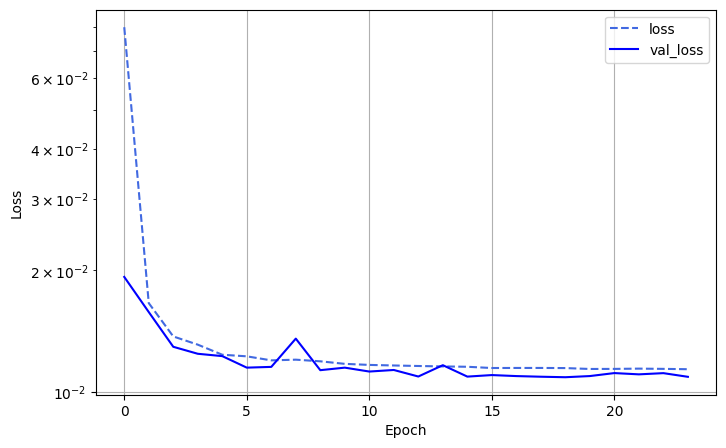

In [9]:
fig, ax = plt.subplots(1, figsize=(8,5))
n = np.arange(len(fit.history['loss']))

ax.plot(n, fit.history['loss'], ls='--', c='royalblue', label='loss')
ax.plot(n, fit.history['val_loss'], label='val_loss', c='blue')

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()
ax.semilogy()
ax.grid()
plt.show()

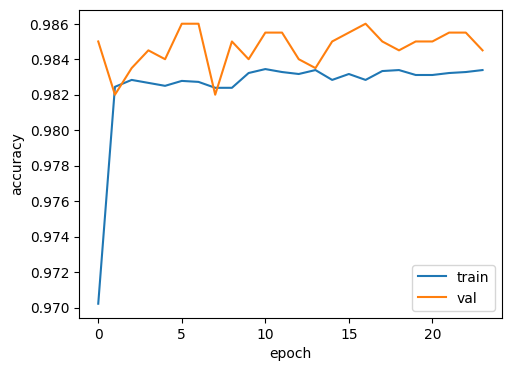

In [10]:
plt.figure(1, (12, 4))
plt.subplot(1, 2, 1)
plt.plot(fit.history['accuracy'])
plt.plot(fit.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

188/188 [==============================] - 0s 2ms/step


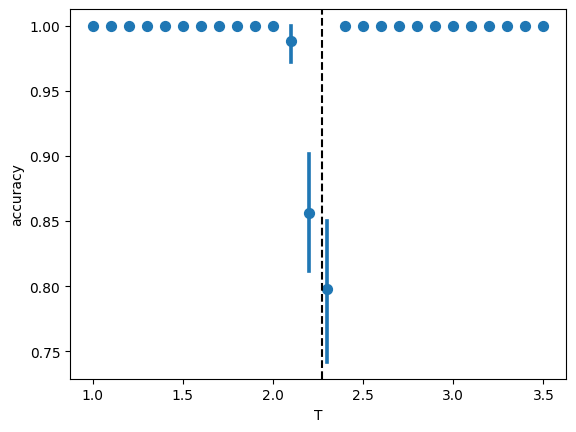

In [11]:
# Import the 'seaborn' library for data visualization
import seaborn as sns

# Evaluate the model on the test data and store the results in 'a'
a = model.evaluate(x_test, y_test, verbose=0)

# Make predictions using the model on the test data, round the predictions, and squeeze the results
preds = model.predict(x_test).round().squeeze()

# Calculate accuracy by comparing the rounded predictions to the true labels
acc = (preds == y_test).astype(float)

# Create a scatter plot with a regression line using 'seaborn'
ax = sns.regplot(x=T_test, y=acc, x_estimator=np.mean, fit_reg=False)

# Set the y-axis label to "accuracy"
ax.set_ylabel("accuracy")

# Set the x-axis label to "T"
ax.set_xlabel("T")

# Add a vertical line at the critical temperature 'Tc' with a dashed line style
plt.axvline(x=Tc, color='k', linestyle='--', label='Tc')